In [1]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import pandas as pd
import numpy as np

In [2]:
pd.set_option('display.max_rows', 100)

In [3]:
df = pd.read_excel('./data/Tourism forecasting competition II dataset.xlsx', sheet_name='data for forecasting')

In [4]:
df['Date'] = pd.to_datetime(df['Unnamed: 0'], format='%YM%m').dt.normalize()
df = df.drop(columns='Unnamed: 0')
df = df.set_index('Date')

In [5]:
df

,Canada,Chile,Mexico,Chinese Taipei,Hong Kong SAR,Japan,Korea (ROK),"Macao, China",Maldives,Cambodia,Indonesia,Singapore,New Zealand,USA,Thailand,Turkey,Australia,Hawaii,Austria,Czech
Date,,,,,,,,,,,,,,,,,,,,
1989-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1660.0,532.0,NaN,NaN
1989-02-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3090.0,1550.0,NaN,NaN
1989-03-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2570.0,822.0,NaN,NaN
1989-04-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1580.0,1010.0,NaN,NaN
1989-05-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1850.0,1383.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-10-01,8817.0,822.0,6888.0,2461.0,47607.0,21498.0,22940.0,518843.0,1157.0,13490.0,17166.0,14971.0,2327.0,32137.0,35410.0,8558.0,7070.0,434.0,5018.0,7180.0
2022-11-01,7216.0,1023.0,10359.0,3645.0,58694.0,21016.0,24174.0,320267.0,1175.0,14733.0,20065.0,16024.0,2866.0,31651.0,37113.0,7717.0,9100.0,795.0,4220.0,8048.0
2022-12-01,9217.0,1372.0,17627.0,5437.0,67244.0,33567.0,27367.0,336593.0,2468.0,16227.0,29642.0,19684.0,4731.0,48435.0,54146.0,10954.0,13880.0,2068.0,7166.0,9546.0


In [6]:
def plot_data(df, country=None, by_month=False):
    fig, ax = plt.subplots(figsize=(12, 6))
    if country is not None:
        if isinstance(country, str):
            country = [country]
        for c in country:
            assert c in df.columns
        df = df[country]
    else:
        country = df.columns
    df = df.loc[df.first_valid_index(): df.last_valid_index()]
    df = df.unstack().reset_index()
    df.columns = ['Country', 'Date', 'Arrival']
    if by_month:
        df['Year'], df['Month'] = df['Date'].dt.year.astype(str), df['Date'].dt.month
        if len(country) == 1:
            sns.lineplot(data=df, x='Month', y='Arrival', hue='Year', ax=ax)
        else:
            sns.lineplot(data=df, x='Month', y='Arrival', hue='Country', style='Year', ax=ax)
    else:
        sns.lineplot(data=df, x='Date', y='Arrival', hue='Country', ax=ax)
    
    plt.xticks(rotation=45, ha='right')
    # for plotting months
    # if not by_month:
    #     locator = mdates.MonthLocator(bymonth=[3,6,9,12])
    #     ax.xaxis.set_minor_locator(locator)
    #     ax.xaxis.set_minor_formatter(mdates.ConciseDateFormatter(locator))

    return df

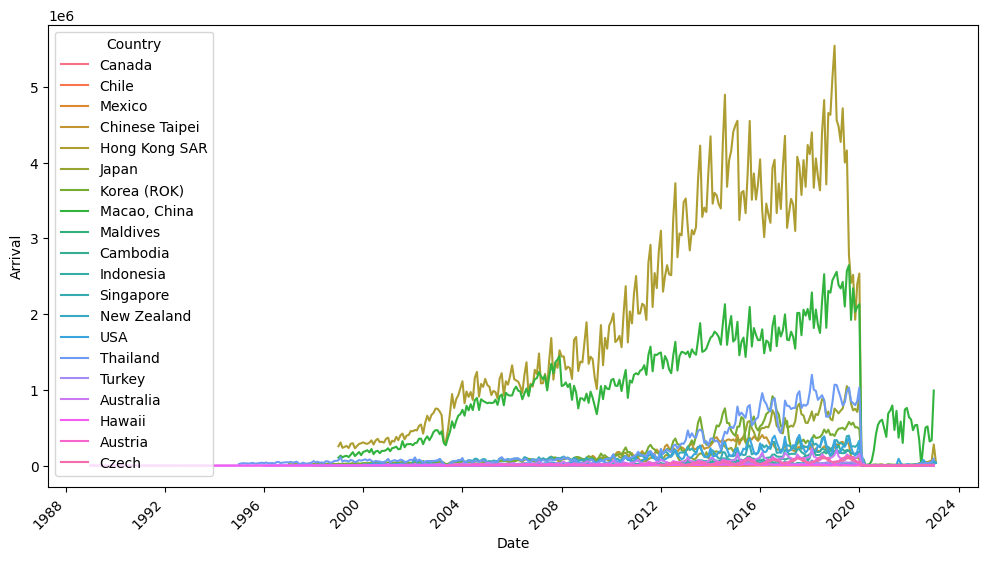

In [7]:
plot_df = plot_data(df)

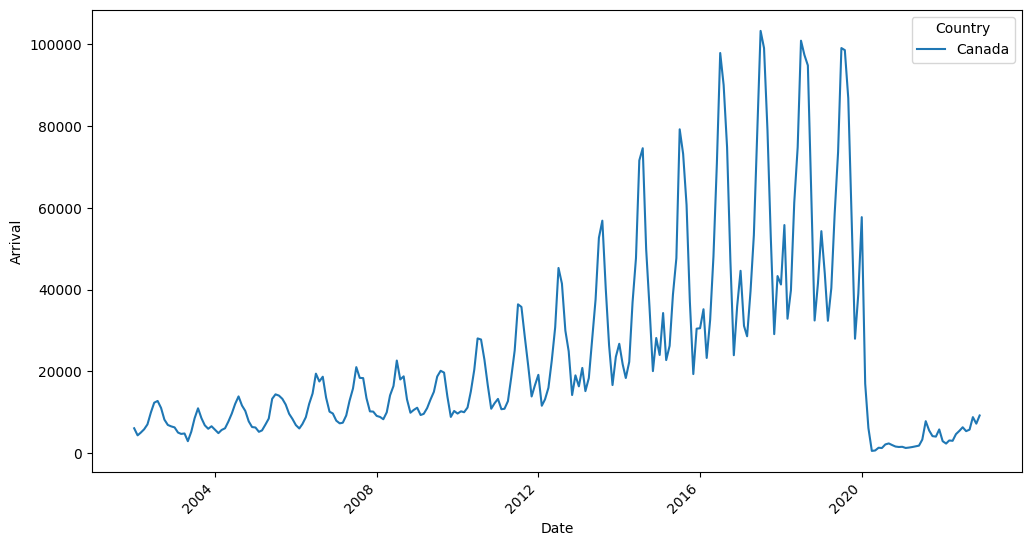

In [9]:
plot_df = plot_data(df, country='Canada')

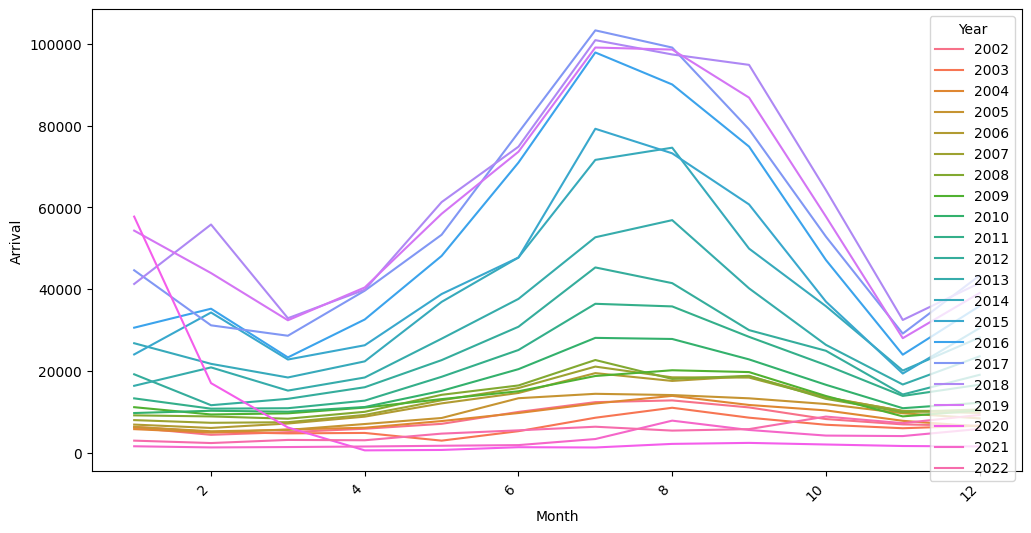

In [8]:
plot_df = plot_data(df, country='Canada', by_month=True)

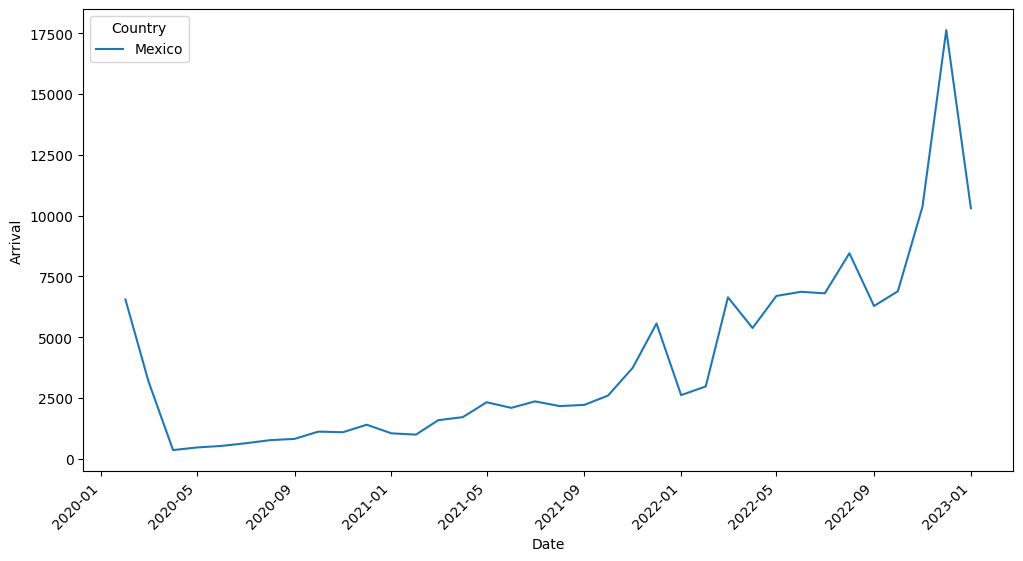

In [14]:
plot_df = plot_data(df[df.index > '2020-01-01'], country=['Mexico'], by_month=False)